In [1]:
# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
from keras.models import Sequential # 导入keras中的Sequential序贯模型，像搭汉堡包一样一层一层堆叠神经网络
from keras.layers.core import Dense, Dropout # 导入keras中的全连接层、Dropout层
from keras.optimizers import SGD # 导入随机梯度下降SGD优化器

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist  

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# 加载mnist数据集
f = np.load('./dataset_karas/mnist/mnist.npz')
X_train, y_train = f['x_train'], f['y_train']
X_test, y_test = f['x_test'], f['y_test']
f.close()

In [6]:
print('训练集特征的维度：',X_train.shape)
print('测试集特征的维度',X_test.shape)
print('训练集标签的维度',y_train.shape)
print('测试集标签的维度',y_test.shape)

训练集特征的维度： (60000, 28, 28)
测试集特征的维度 (10000, 28, 28)
训练集标签的维度 (60000,)
测试集标签的维度 (10000,)


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
X_train[2].shape

(28, 28)

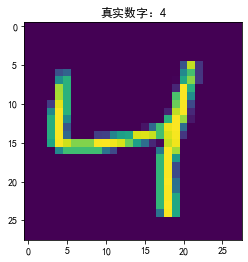

In [9]:
plt.imshow(X_train[2])
plt.title('真实数字：'+str(y_train[2]))
plt.show()

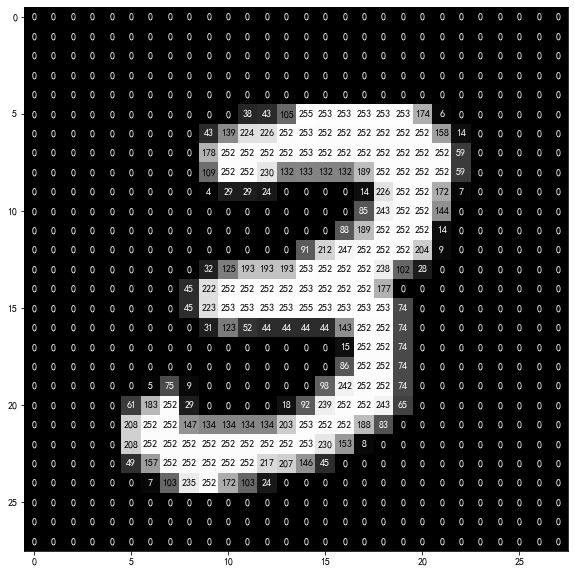

In [10]:
# 绘制像素热力图
def visualize_input(img, ax):
    # 先绘制数字的大图，然后对784个像素每一个像素标注灰度值
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    

i = 7 # 绘制数据集中索引为7的图像
fig = plt.figure(figsize = (10,10)) # 设定图的总大小
ax = fig.add_subplot(111)
# 调用绘图函数
visualize_input(X_train[i], ax)

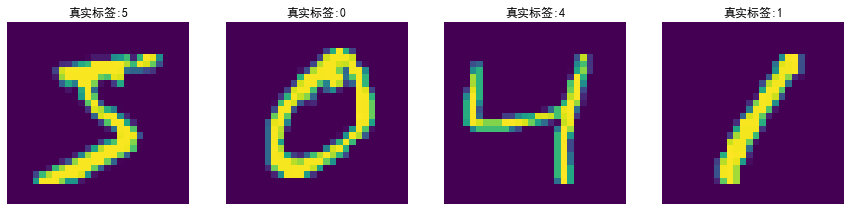

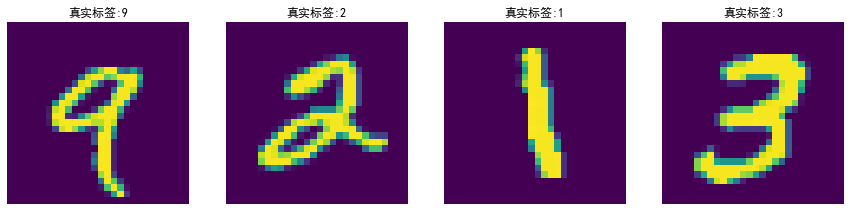

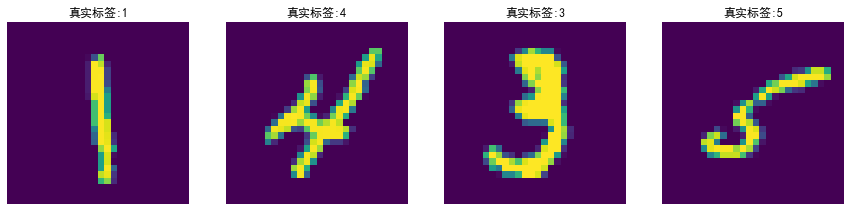

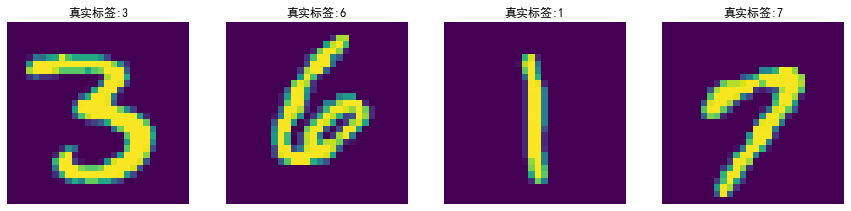

In [11]:
# 绘制前16张图像，可以修改16这个数字，展示前若干张图像
for i in range(16):
    plt.style.use({'figure.figsize':(15,15)}) # 设置图像大小
    plt.subplot(1,4,i%4+1) # 绘制一行四列的子图
    plt.imshow(X_train[i]) # 绘制被分类错误的图片
    title = '真实标签:{}'.format(str(y_train[i])) # 图表标题说明图片的正确标签和错误结果
    plt.title(title)
    plt.xticks([]) # 关闭刻度线显示
    plt.yticks([])
    plt.axis('off') # 关闭坐标轴显示
    if i%4 == 3: # 凑够一行四个图就显示出来
        plt.show()

In [12]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [13]:
# 幅度缩放，归一化
X_train /= 255
X_test /= 255

In [14]:
# 前十个训练集标签
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [15]:
from keras.utils import np_utils

In [16]:
# 把标签等转成one-hot的形式
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [17]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [19]:
# 设置绘图大小
plt.style.use({'figure.figsize':(5,5)})

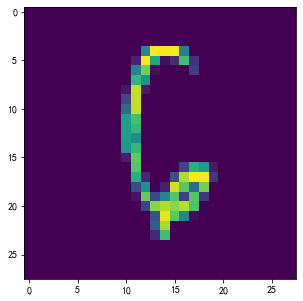

In [20]:
plt.imshow(X_train[0].reshape(28, 28))

In [21]:
model = Sequential()
model.add(Dense(513, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 513)               402705    
_________________________________________________________________
dropout_1 (Dropout)          (None, 513)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 671,003
Trainable params: 671,003
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 配置Tensorboard可视化工具
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='tensorboard\keras_log')  

In [24]:
# 训练25轮，每个batch输入128个数据
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=50, verbose=1, validation_data=(X_val, Y_val),callbacks=[tensorboard])


Train on 45000 samples, validate on 15000 samples


Epoch 1/50
45000/45000 [==============================] - 2s 52us/step - loss: 2.2491 - accuracy: 0.1749 - val_loss: 2.1185 - val_accuracy: 0.3909

Epoch 2/50
45000/45000 [==============================] - 2s 40us/step - loss: 2.0388 - accuracy: 0.3966 - val_loss: 1.9025 - val_accuracy: 0.6109
Epoch 3/50
45000/45000 [==============================] - 2s 40us/step - loss: 1.8309 - accuracy: 0.5560 - val_loss: 1.6775 - val_accuracy: 0.6881
Epoch 4/50
45000/45000 [==============================] - 2s 40us/step - loss: 1.6188 - accuracy: 0.6376 - val_loss: 1.4532 - val_accuracy: 0.7247
Epoch 5/50
45000/45000 [==============================] - 2s 40us/step - loss: 1.4159 - accuracy: 0.6805 - val_loss: 1.2505 - val_accuracy: 0.7533
Epoch 6/50
45000/45000 [==============================] - 2s 39us/step - loss: 1.2409 - accuracy: 0.7142 - val_loss: 1.0829 - val_accuracy: 0.7767
Epoch 7/50
45000/45000 [==============================] - 2s 40u

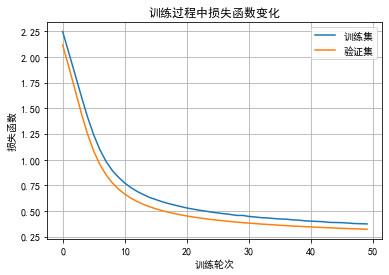

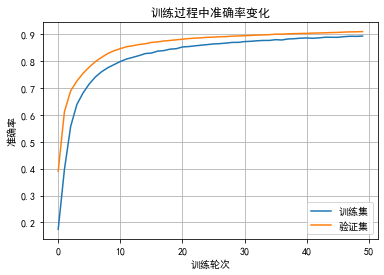

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('训练轮次')
    plt.ylabel('损失函数')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['训练集', '验证集'])
    plt.title('训练过程中损失函数变化')
    plt.grid()

    plt.figure()
    plt.xlabel('训练轮次')
    plt.ylabel('准确率')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['训练集', '验证集'], loc='lower right')
    plt.title('训练过程中准确率变化')
    plt.grid()
    plt.show()

plot_history(network_history)

抽取512神经元的中间层输出结果并可视化

In [26]:
model_truncated = Sequential()
model_truncated.add(Dense(513, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [27]:
model_truncated.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 513)               402705    
_________________________________________________________________
dropout_3 (Dropout)          (None, 513)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               263168    
Total params: 665,873
Trainable params: 665,873
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 抽取特征
hidden_features = model_truncated.predict(X_train)

In [29]:
hidden_features.shape

(45000, 512)

选取可视化的数字个数

In [30]:
Number_Of_Show = 5000

In [31]:
from sklearn.manifold import TSNE
# 使用T-SNE降维到2维，方便可视化
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:Number_Of_Show])

In [32]:
# 将降维后的坐标归一化
x_min,x_max = np.min(X_tsne,0),np.max(X_tsne,0)
X_tsne = (X_tsne-x_min)/(x_max-x_min)

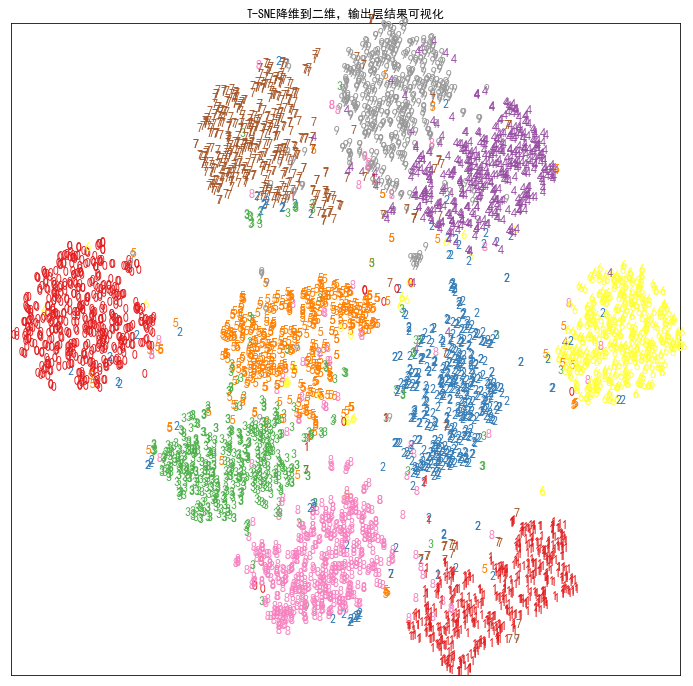

In [33]:
# TSNE降维降到二维，数字图可视化
colors_map = np.argmax(Y_train, axis=1)
label = colors_map[:Number_Of_Show]
plt.figure(figsize=(12,12))
for i in range(X_tsne.shape[0]):
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color=plt.cm.Set1(label[i]/10.),fontdict={'weight':'bold','size':12})
plt.xticks([])
plt.yticks([])
plt.title('T-SNE降维到二维，输出层结果可视化')
plt.show()

降维到三维

In [34]:
Number_Of_Show = 1500

In [ ]:
from sklearn.manifold import TSNE
# 降维到3维，方便可视化
tsne3 = TSNE(n_components=3)
X_tsne3 = tsne3.fit_transform(hidden_features[:Number_Of_Show])

In [ ]:
# 将降维后的坐标归一化
x_min_3,x_max_3 = np.min(X_tsne3,0),np.max(X_tsne3,0)
X_tsne3 = (X_tsne3-x_min_3)/(x_max_3-x_min_3)

In [ ]:
X_tsne3

In [ ]:
nb_classes = 10

In [ ]:
# TSNE降维降到三维，散点图可视化 交互式
from mpl_toolkits import mplot3d
from ipywidgets import interact

def plot_3D(elev=30, azim=30):
    fig = plt.figure(figsize=(15,10))
    ax = fig.gca(projection='3d')
    
    for cl in range(nb_classes):
        indices = np.where(colors_map==cl)[0]
        ax.scatter(X_tsne3[indices[:120],0],X_tsne3[indices[:120],1],X_tsne3[indices[:120],2],c=colors[cl], label=cl)
    
        # ax.scatter3D(X_tsne3[:,0],X_tsne3[:,1],X_tsne3[:,2],c=y_train[:5000],cmap=plt.cm.Spectral,marker = 'o',s=50,label=y_train[:5000])
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.legend()
interact(plot_3D, elev=[30,45,60],azip=(-180,180))